In [74]:
#Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

In [54]:
# Load the dataset
data = pd.read_csv('C:/Users/AM.circular/Downloads/Housing.csv')  

In [55]:
# Display the first 5 rows of the DataFrame
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [56]:
# Get the dimensions of the DataFrame (rows, columns)
print(data.shape)

(545, 13)


In [57]:
# Get general info about the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [58]:
# Get basic statistics of numeric columns
print(data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


**Some graphical visualization about data.**

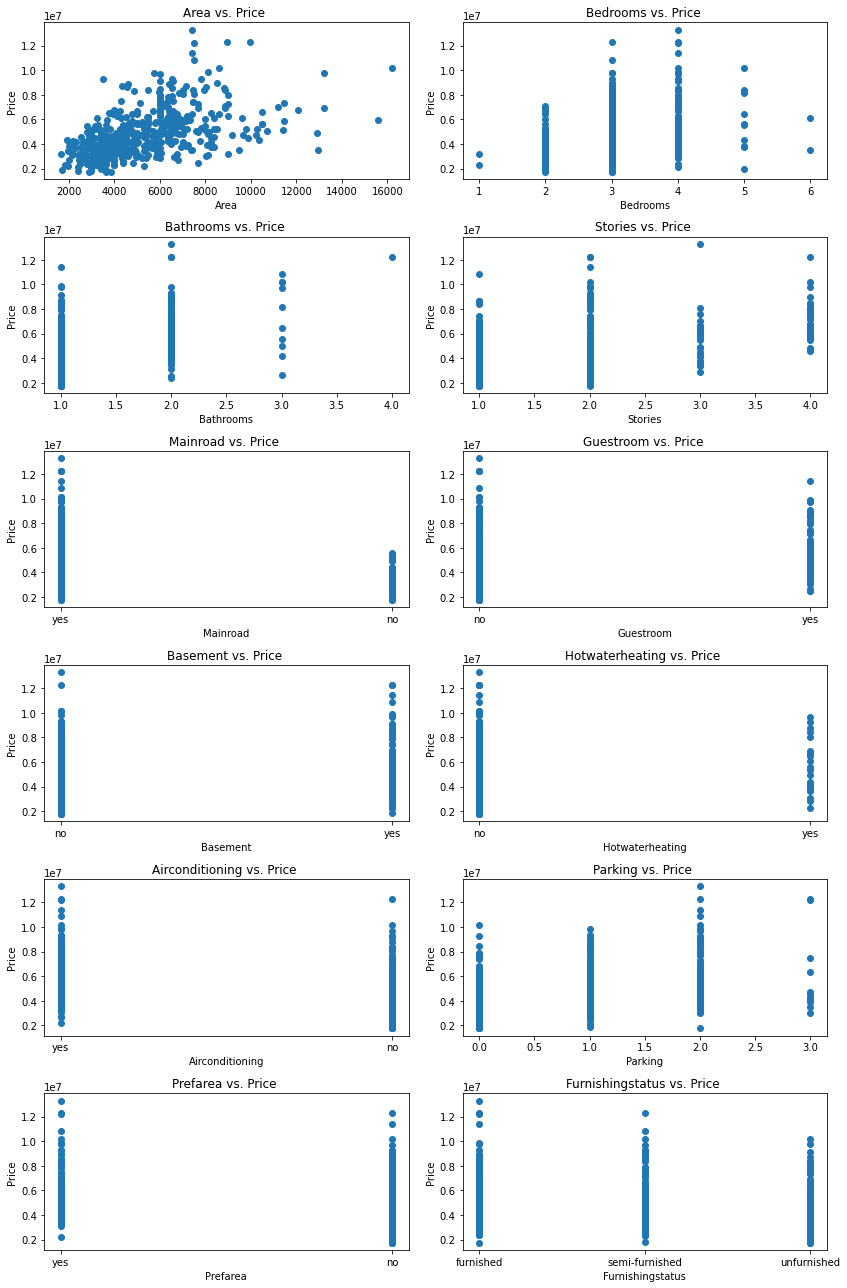

In [59]:
# List of input attributes
input_attributes = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
                    'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

# Create subplots for each attribute
num_rows = (len(input_attributes) + 1) // 2  # Calculate number of rows for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 18))

for i, attr in enumerate(input_attributes):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Scatter plot of attribute vs. price area
    ax.scatter(data[attr], data['price'])
    ax.set_title(f'{attr.capitalize()} vs. Price ')
    ax.set_xlabel(attr.capitalize())
    ax.set_ylabel('Price')
    


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

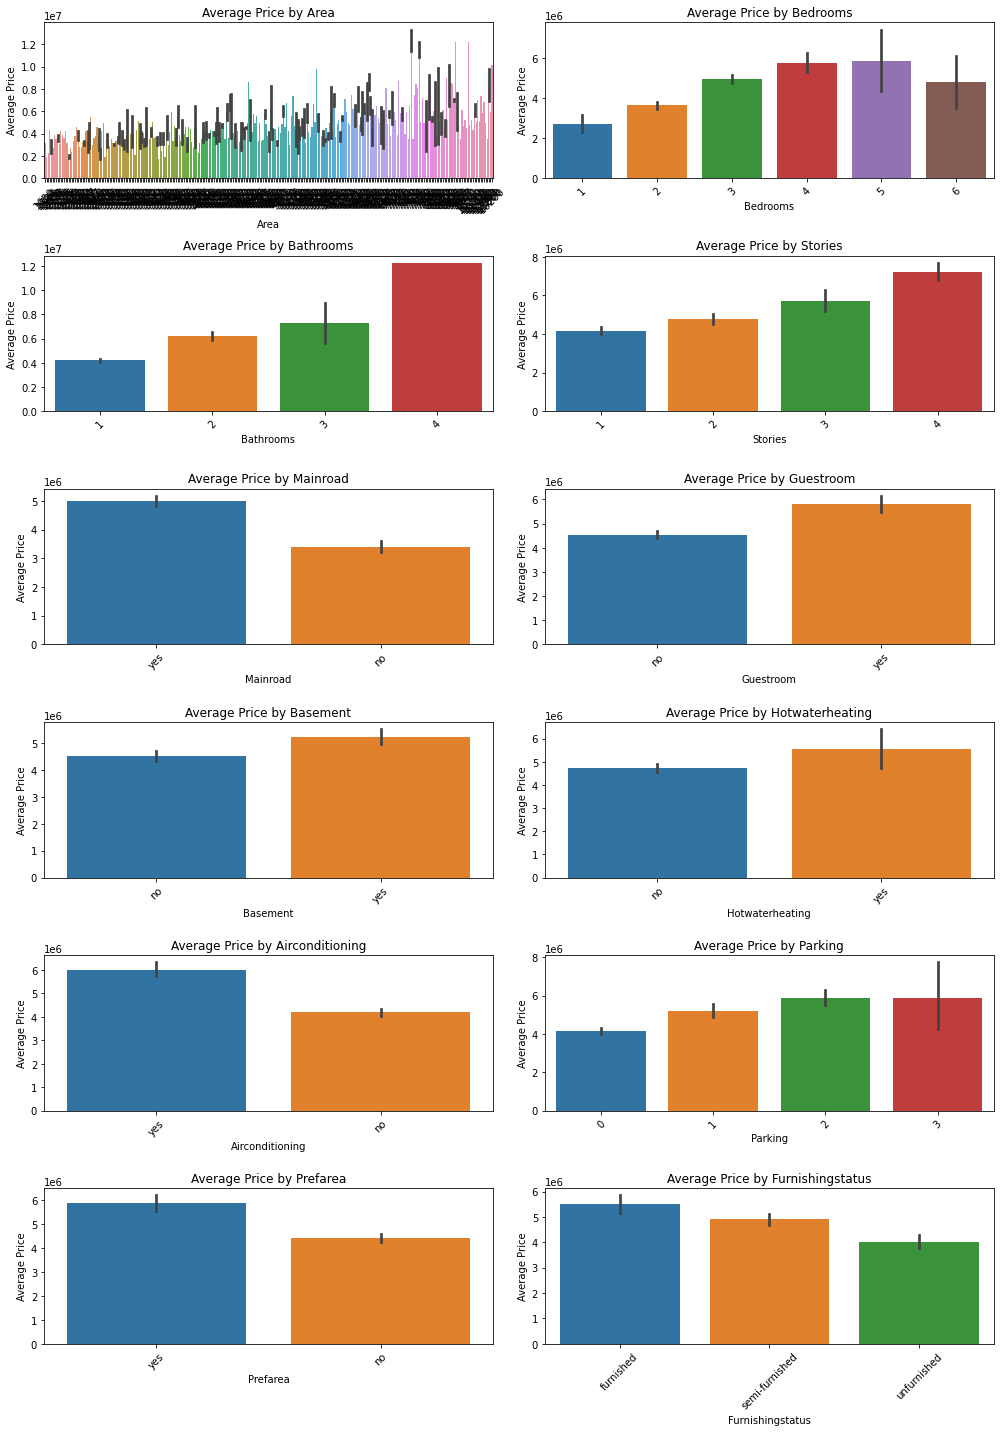

In [60]:
# List of categorical attributes
categorical_attributes = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
                          'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

# Create subplots for each categorical attribute
num_rows = (len(categorical_attributes) + 1) // 2  # Calculate number of rows for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, 20))

for i, attr in enumerate(categorical_attributes):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Create a bar plot showing the average price for each category
    sns.barplot(x=attr, y='price', data=data, ax=ax)
    ax.set_title(f'Average Price by {attr.capitalize()}')
    ax.set_xlabel(attr.capitalize())
    ax.set_ylabel('Average Price')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [61]:
# Define features (X) and target (y)
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
          'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = data['price']

In [62]:
X = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement',
                               'hotwaterheating', 'airconditioning', 'prefarea'], drop_first=True)

# Handle 'furnishingstatus' with label encoding or other appropriate method
furnishing_mapping = {'semi-furnished': 1, 'unfurnished': 2, 'furnished': 3}
X['furnishingstatus'] = X['furnishingstatus'].map(furnishing_mapping)

In [63]:
#Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [65]:
#Make predictions on test data
y_pred = model.predict(X_test)

In [76]:
#Evaluating model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 983518.6085054426
Mean Squared Error (MSE): 1807867379745.5803
Root Mean Squared Error (RMSE): 1344569.589030475


In [77]:
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.6423301504123731


In [67]:
# Mapping for 'furnishingstatus'
furnishing_mapping = {'semi-furnished': 1, 'unfurnished': 2, 'furnished': 3}

# Get user input
area = float(input("Enter the area of the house: "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
stories = int(input("Enter the number of stories: "))
mainroad = input("Main Road (yes/no): ")
guestroom = input("Guest Room (yes/no): ")
basement = input("Basement (yes/no): ")
hotwaterheating = input("Hot Water Heating (yes/no): ")
airconditioning = input("Air Conditioning (yes/no): ")
parking = int(input("Enter the number of parking spots: "))
prefarea = input("Preferred Area (yes/no): ")
furnishingstatus = input("Furnishing Status (semi-furnished/unfurnished/furnished): ")

# Create a dictionary to hold the user input
user_data = {
    'area': [area],  # Wrap input values in a list to match the shape
    'bedrooms': [bedrooms],
    'bathrooms': [bathrooms],
    'stories': [stories],
    'mainroad': [mainroad],
    'guestroom': [guestroom],
    'basement': [basement],
    'hotwaterheating': [hotwaterheating],
    'airconditioning': [airconditioning],
    'parking': [parking],
    'prefarea': [prefarea],
    'furnishingstatus': [furnishingstatus]
}

# Convert user input to a DataFrame
user_df = pd.DataFrame(user_data)

# Perform one-hot encoding on categorical columns
user_df_encoded = pd.get_dummies(user_df, columns=['mainroad', 'guestroom', 'basement',
                                                   'hotwaterheating', 'airconditioning', 'prefarea'], drop_first=True)

# Handle 'furnishingstatus' with label encoding
user_df_encoded['furnishingstatus'] = user_df_encoded['furnishingstatus'].map(furnishing_mapping)

# Ensure the columns in user_df match the columns used during training
user_df_transformed = user_df_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make prediction using the trained model
predicted_price = model.predict(user_df_transformed)

print(f"Predicted Price: {predicted_price[0]}")

Enter the area of the house: 7420
Enter the number of bedrooms: 3
Enter the number of bathrooms: 1
Enter the number of stories: 5
Main Road (yes/no): yes
Guest Room (yes/no): no
Basement (yes/no): yes
Hot Water Heating (yes/no): yes
Air Conditioning (yes/no): yes
Enter the number of parking spots: 3
Preferred Area (yes/no): yes
Furnishing Status (semi-furnished/unfurnished/furnished): semi-furnished
Predicted Price: 5886829.873359508
